### 导入包 与 函数

In [3]:
# 导入包与函数
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import ndimage

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

def median_filter(path: str, index_category: str):
    raw_data = np.load(path).astype(np.float32)
    
    # 归一化
    norm_params = {"dBZ": [0.0, 65.0], "ZDR": [-1.0, 5.0], "KDP":[-1.0, 6.0]}
    mmin, mmax = norm_params[index_category]
    raw_data[raw_data > mmax] = mmax
    raw_data[raw_data < mmin] = mmin
    raw_data = (raw_data - mmin)/(mmax - mmin)

    # plt.imshow(raw_data, cmap='coolwarm', interpolation='nearest')
    # plt.colorbar()
    # plt.savefig(f"raw_data.jpg")
    # plt.close()
    
    # 中值滤波
    img = ndimage.median_filter(raw_data, size=4)
    # plt.imshow(img, cmap='coolwarm', interpolation='nearest')
    # plt.colorbar()
    # plt.savefig(f"img.jpg")
    # plt.close()
    return np.array(img)

### 降水总量 逐数据ID分析

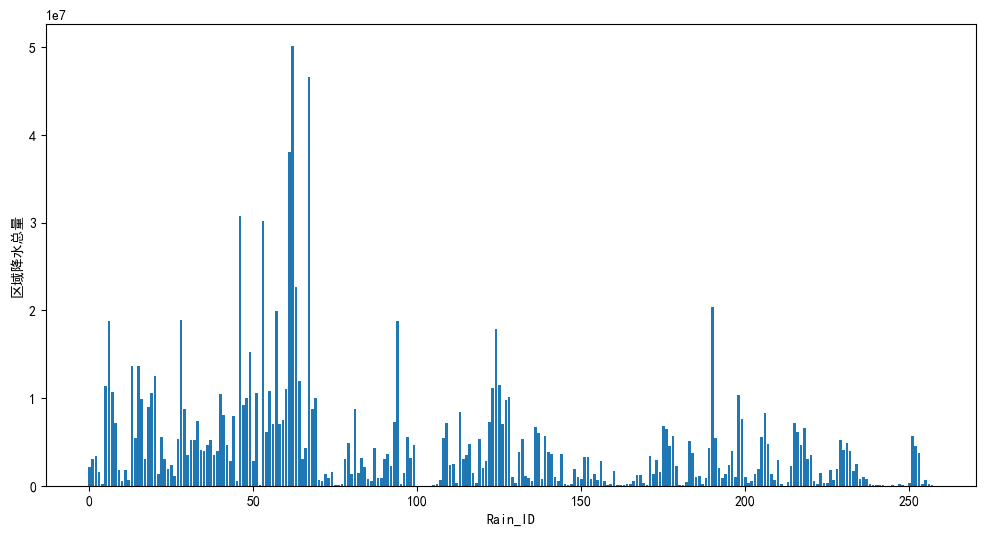

In [4]:
df = pd.read_csv("降水总量.csv")
rain_fall_list = df["rain_fall"].tolist()
# Plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,6), dpi= 100)
ax1.bar(np.arange(len(rain_fall_list)), rain_fall_list)
ax1.set_xlabel("Rain_ID")
ax1.set_ylabel("区域降水总量")
plt.show()

### 对一个数据ID，逐帧ID分析

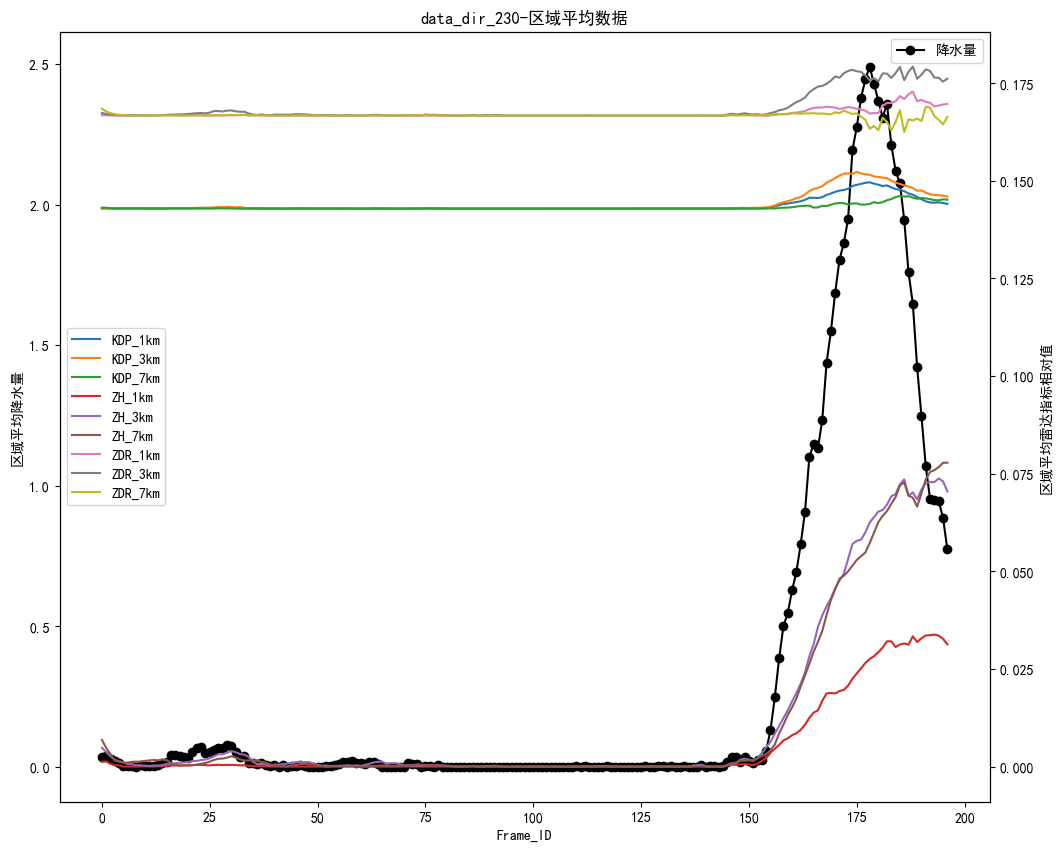

In [5]:
data_item = "data_dir_230"
df_radar = pd.read_csv("radar_path.csv")
df_radar_32 = df_radar[df_radar["rain_id"] == data_item]

df_KDP = df_radar_32[df_radar_32["index_category"] == "KDP"]
df_KDP_1km = df_KDP[df_KDP["height"] == "1.0km"]
df_KDP_3km = df_KDP[df_KDP["height"] == "3.0km"]
df_KDP_7km = df_KDP[df_KDP["height"] == "7.0km"]

df_dBZ = df_radar_32[df_radar_32["index_category"] == "dBZ"]
df_dBZ_1km = df_dBZ[df_dBZ["height"] == "1.0km"]
df_dBZ_3km = df_dBZ[df_dBZ["height"] == "3.0km"]
df_dBZ_7km = df_dBZ[df_dBZ["height"] == "7.0km"]

df_ZDR = df_radar_32[df_radar_32["index_category"] == "ZDR"]
df_ZDR_1km = df_ZDR[df_ZDR["height"] == "1.0km"]
df_ZDR_3km = df_ZDR[df_ZDR["height"] == "3.0km"]
df_ZDR_7km = df_ZDR[df_ZDR["height"] == "7.0km"]

df_rainfall = pd.read_csv("rainfall_path.csv")
df_rainfall_32 = df_rainfall[df_rainfall["rain_id"] == data_item]

rainfall_mean_32 = [] 
for path in df_rainfall_32["rainfall_path"]:
    rainfall_mean = np.mean(np.load(path[8:]))
    rainfall_mean_32.append(rainfall_mean)

KDP_1km_32 = []
for path in df_KDP_1km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "KDP"))
    KDP_1km_32.append(mean)
    
KDP_3km_32 = []
for path in df_KDP_3km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "KDP"))
    KDP_3km_32.append(mean)
    
KDP_7km_32 = []
for path in df_KDP_7km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "KDP"))
    KDP_7km_32.append(mean)
    
dBZ_1km_32 = []
for path in df_dBZ_1km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "dBZ"))
    dBZ_1km_32.append(mean)
    
dBZ_3km_32 = []
for path in df_dBZ_3km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "dBZ"))
    dBZ_3km_32.append(mean)
    
dBZ_7km_32 = []
for path in df_dBZ_7km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "dBZ"))
    dBZ_7km_32.append(mean)

ZDR_1km_32 = []
for path in df_ZDR_1km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "ZDR"))
    ZDR_1km_32.append(mean)
    
ZDR_3km_32 = []
for path in df_ZDR_3km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "ZDR"))
    ZDR_3km_32.append(mean)
    
ZDR_7km_32 = []
for path in df_ZDR_7km["radar_path"]:
    mean = np.mean(median_filter(path[8:], "ZDR"))
    ZDR_7km_32.append(mean)


# Plot

fig, ax1 = plt.subplots(1, 1, figsize=(12,10), dpi= 100)
ax1.plot(rainfall_mean_32, label='降水量', marker='o', color="#000000")
ax1.set_xlabel("Frame_ID")
ax1.set_ylabel("区域平均降水量")
plt.legend()
plt.title(f"{data_item}-区域平均数据")
ax2=ax1.twinx()
ax2.plot(KDP_1km_32, label='KDP_1km')
ax2.plot(KDP_3km_32, label='KDP_3km')
ax2.plot(KDP_7km_32, label='KDP_7km')
ax2.plot(dBZ_1km_32, label='ZH_1km')
ax2.plot(dBZ_3km_32, label='ZH_3km')
ax2.plot(dBZ_7km_32, label='ZH_7km')
ax2.plot(ZDR_1km_32, label='ZDR_1km')
ax2.plot(ZDR_3km_32, label='ZDR_3km')
ax2.plot(ZDR_7km_32, label='ZDR_7km')
ax2.set_ylabel("区域平均雷达指标相对值")
plt.legend()

plt.show()
plt.close()

### 选取一个rain_id，选取几个frame_id对绘制平面图

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:48: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,rainfall, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


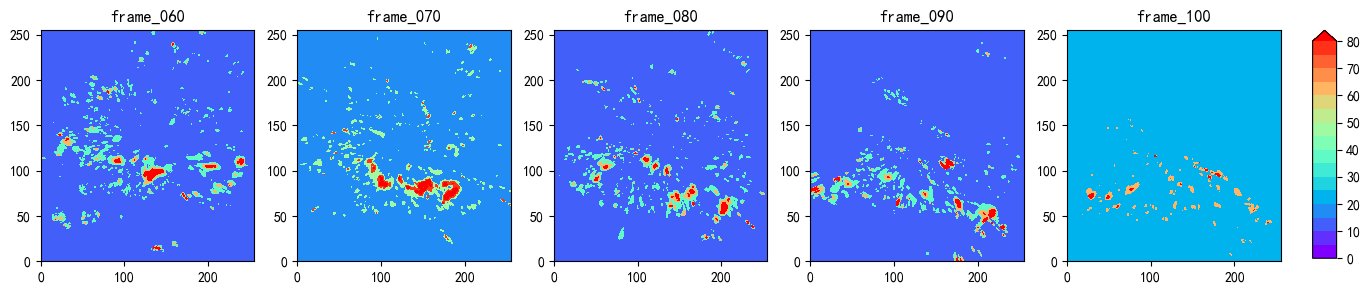

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:66: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


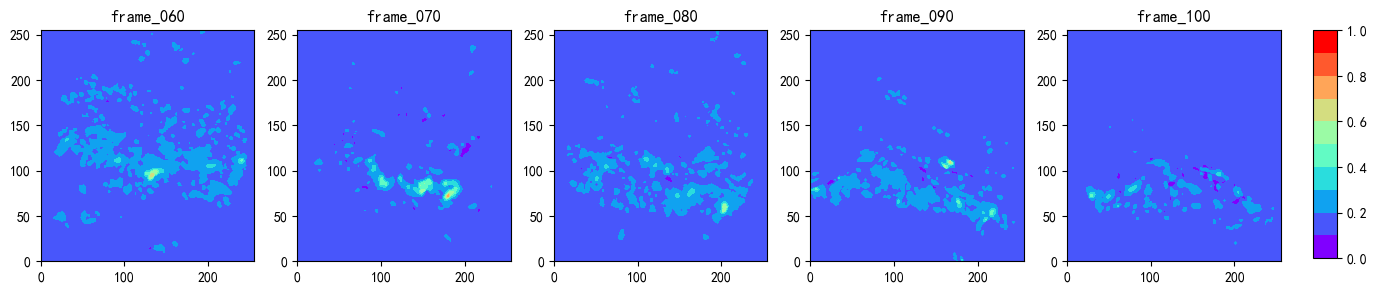

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:82: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


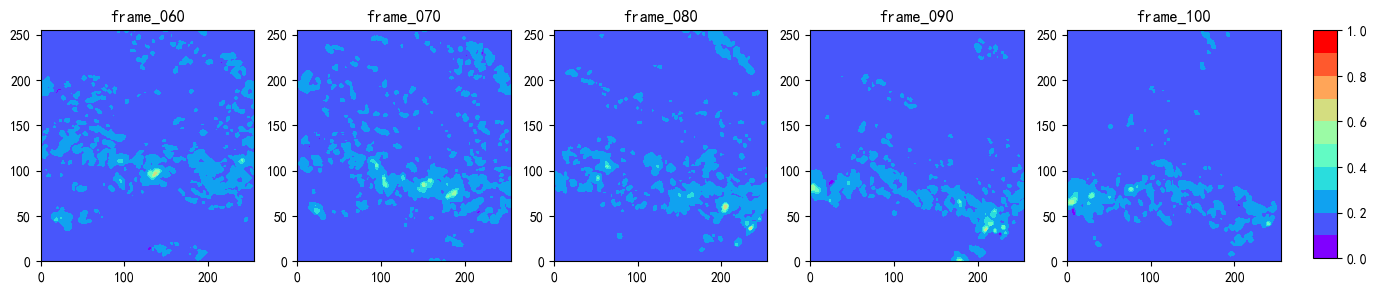

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:98: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


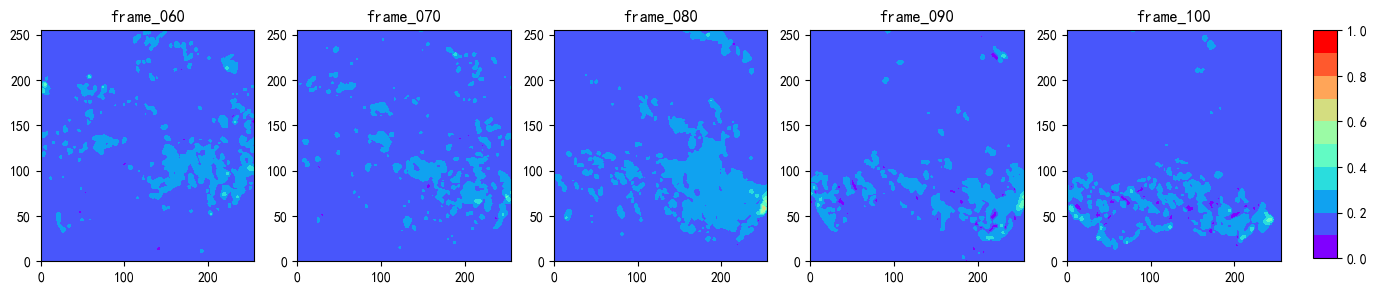

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:115: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


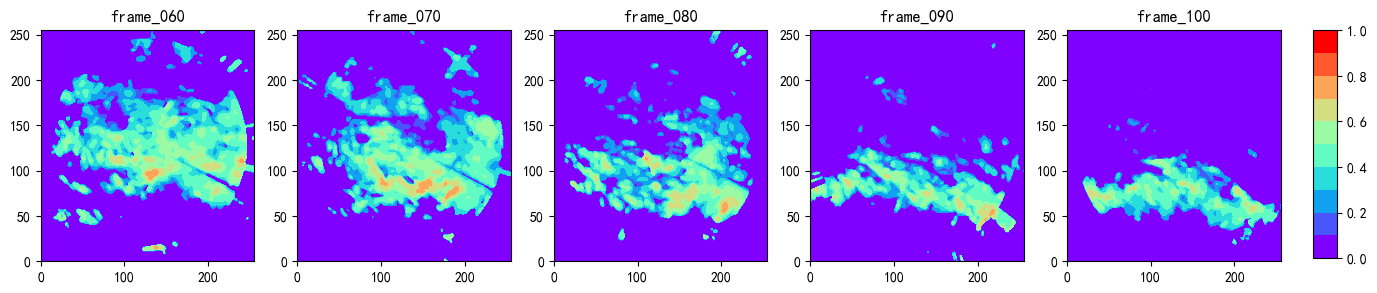

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:131: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


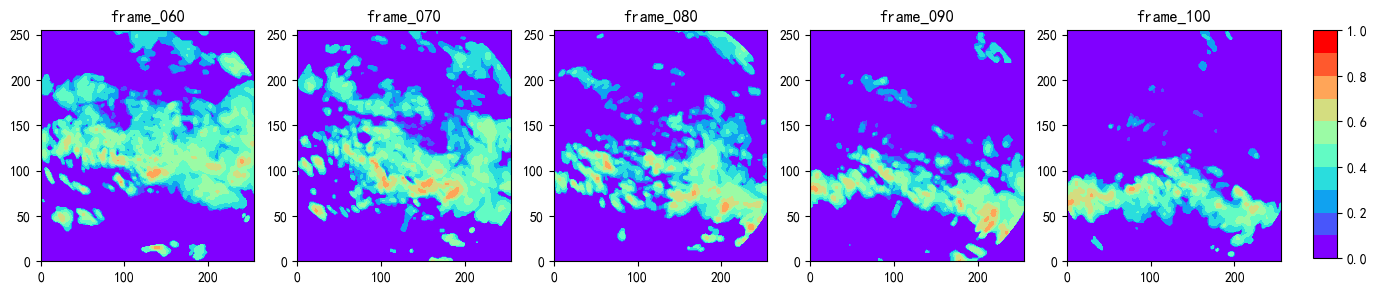

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:147: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


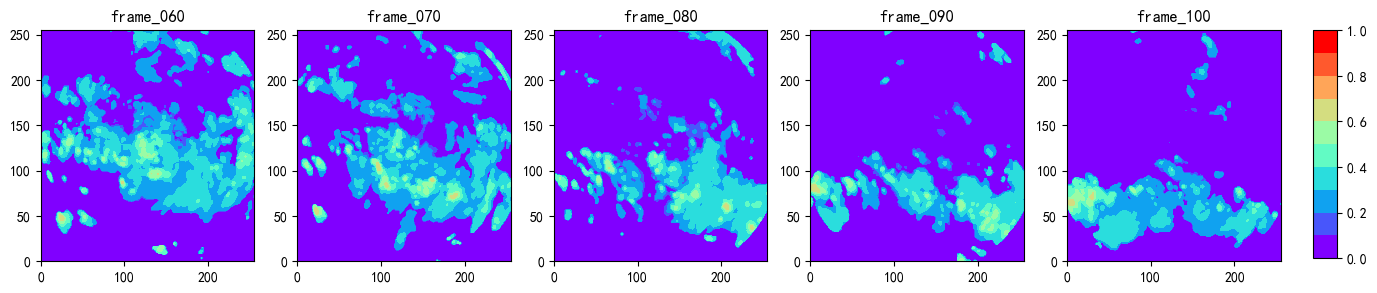

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:164: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


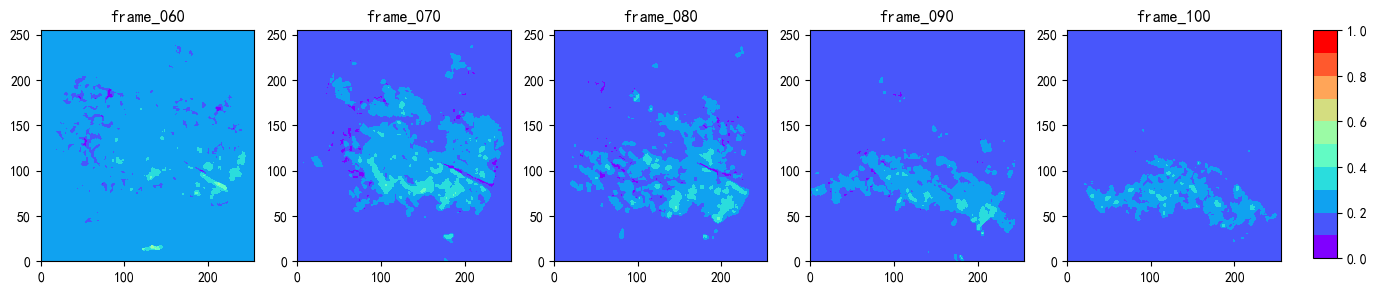

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:180: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


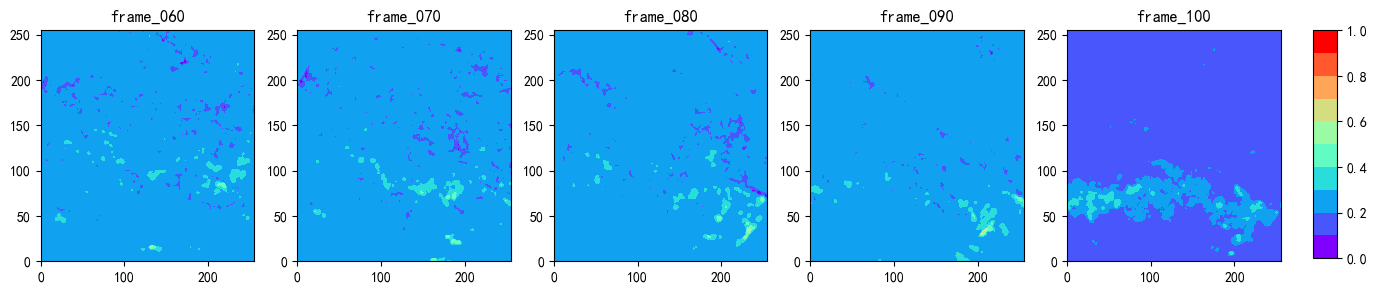

C:\Users\Noel\AppData\Local\Temp\ipykernel_10276\2078146710.py:196: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow


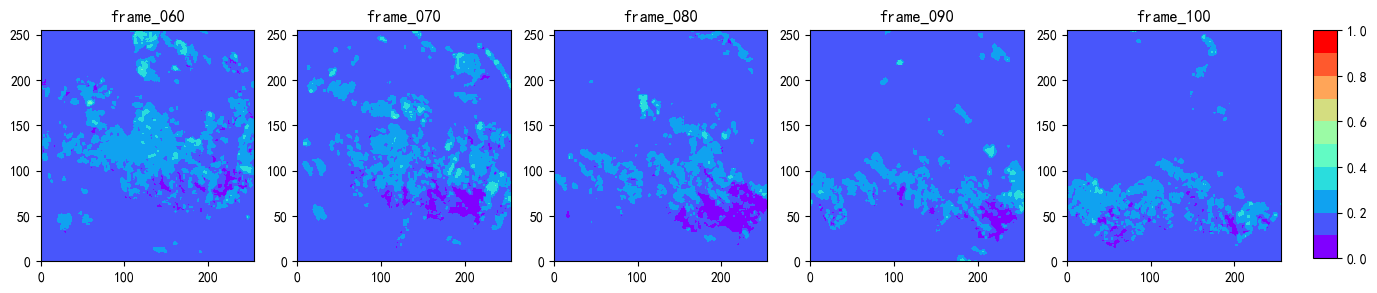

In [6]:
rain_id = "data_dir_062"
frame_id_list = ["frame_060.npy", "frame_070.npy", "frame_080.npy", "frame_090.npy", "frame_100.npy"]

df_rainfall = pd.read_csv("rainfall_path.csv")
df_radar = pd.read_csv("radar_path.csv")
df_rainfall_rain_id = df_rainfall[df_rainfall["rain_id"] == rain_id]
df_radar_rain_id = df_radar[df_radar["rain_id"] == rain_id]

df_KDP = df_radar_rain_id[df_radar_rain_id["index_category"] == "KDP"]
df_KDP_1km = df_KDP[df_KDP["height"] == "1.0km"]
df_KDP_3km = df_KDP[df_KDP["height"] == "3.0km"]
df_KDP_7km = df_KDP[df_KDP["height"] == "7.0km"]

df_dBZ = df_radar_rain_id[df_radar_rain_id["index_category"] == "dBZ"]
df_dBZ_1km = df_dBZ[df_dBZ["height"] == "1.0km"]
df_dBZ_3km = df_dBZ[df_dBZ["height"] == "3.0km"]
df_dBZ_7km = df_dBZ[df_dBZ["height"] == "7.0km"]

df_ZDR = df_radar_rain_id[df_radar_rain_id["index_category"] == "ZDR"]
df_ZDR_1km = df_ZDR[df_ZDR["height"] == "1.0km"]
df_ZDR_3km = df_ZDR[df_ZDR["height"] == "3.0km"]
df_ZDR_7km = df_ZDR[df_ZDR["height"] == "7.0km"]


xx = np.arange(256)
yy = np.arange(256)
X, Y = np.meshgrid(xx, yy)
cmap = mpl.cm.rainbow

l = 0.92
b = 0.12
w = 0.015
h = 1-2*b
rect = [l, b, w, h]

# rainfall
fig = plt.figure(figsize=(16, 3), dpi=100)
norm = mpl.colors.BoundaryNorm([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], cmap.N, extend="max")
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))


    df_rainfall_rain_id_frame_id = df_rainfall_rain_id[df_rainfall_rain_id["frame_id"] == frame_id]
    rainfall_path = df_rainfall_rain_id_frame_id["rainfall_path"].item()
    rainfall = np.load(rainfall_path[8:])

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,rainfall, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()

norm = mpl.colors.BoundaryNorm([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], cmap.N)
# KDP_1km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_KDP_1km[df_KDP_1km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "KDP")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()
# KDP_3km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_KDP_3km[df_KDP_3km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "KDP")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()
# KDP_7km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_KDP_7km[df_KDP_7km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "KDP")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()

# dBZ_1km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_dBZ_1km[df_dBZ_1km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "dBZ")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()
# dBZ_3km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_dBZ_3km[df_dBZ_3km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "dBZ")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()
# dBZ_7km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_dBZ_7km[df_dBZ_7km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "dBZ")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()

# ZDR_1km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_ZDR_1km[df_ZDR_1km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "ZDR")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()
# ZDR_3km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_ZDR_3km[df_ZDR_3km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "ZDR")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()
# ZDR_7km
fig = plt.figure(figsize=(16, 3), dpi=100)
for i, frame_id in enumerate(frame_id_list):
    ax = fig.add_subplot(int("1" + str(len(frame_id_list)) + f"{i+1}"))
    
    df_frame_id = df_ZDR_7km[df_ZDR_7km["frame_id"] == frame_id]
    path = df_frame_id["radar_path"].item()
    data = median_filter(path[8:], "ZDR")

    ax.set_title(frame_id[:-4])
    ax.contourf(X,Y,data, zdim='z',offset=0, cmap=cmap, norm=norm)   #等高线图，要设置offset，为Z的最小值    cmap = mpl.cm.rainbow
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes(rect)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
plt.show()
plt.close()



### 制作量csv降水总量

In [ ]:
df_rainfall = pd.read_csv("rainfall_path.csv")
rain_id_list = df_rainfall["rain_id"].unique().tolist()

rain_fall_list = []
for rain_id in rain_id_list:
    df_rain_id = df_rainfall[df_rainfall["rain_id"] == rain_id]
    
    rainfall_rain_id = 0.0
    for path in df_rain_id["rainfall_path"]:
        data = np.sum(np.load(path[8:]))
        rainfall_rain_id += data
    rain_fall_list.append(rainfall_rain_id)

df = pd.DataFrame({"rain_fall": rain_fall_list})
df.to_csv("降水总量.csv")

### 时间序列长度统计

In [ ]:
df1 = pd.read_csv("/home/zhouquan/MyDoc/Math_Model/Dataset/Saved/帧数统计.csv")
print(df1[df1["num"]==204]["rain_id"])
time0to5 = df1.query("num >= 0 and num < 50") #0<= t < 5
time5to10 = df1.query("num >= 50 and num < 100")
time10to15 = df1.query("num >= 100 and num < 150")
time15to20 = df1.query("num >= 150 and num < 200")
timeover20 = df1.query("num >= 200")

i_name=["[0, 5)", "[5, 10)", "[10, 15)", "[15, 20)", "[20, Inf)"]
i_marker=['.', ',' , 'o', 'v', '$\clubsuit$']
i_color=['#c72e29', '#098154', '#fb832d', '#6950a1', '#ed1941']

fig,ax1=plt.subplots(1,1,figsize=(10,8), dpi= 1000)

ax1.scatter(time0to5.index, time0to5["num"]/10, color=i_color[0], marker=i_marker[0], label=i_name[0])
ax1.scatter(time5to10.index, time5to10["num"]/10, color=i_color[1], marker=i_marker[1], label=i_name[1])
ax1.scatter(time10to15.index, time10to15["num"]/10, color=i_color[2], marker=i_marker[2], label=i_name[2])
ax1.scatter(time15to20.index, time15to20["num"]/10, color=i_color[3], marker=i_marker[3], label=i_name[3])
ax1.scatter(timeover20.index, timeover20["num"]/10, color=i_color[4], marker=i_marker[4], label=i_name[4])
ax1.set_xlabel("Data_ID", fontproperties = zhfont)
ax1.set_ylabel(f"时间序列长度/(小时)", fontproperties = zhfont)
ax1.legend()
plt.show()

### 其他

C:\Users\Noel\AppData\Local\Temp\ipykernel_46468\24856387.py:9: UserWarning: The following kwargs were not used by contour: 'zdim', 'offset'
  plt.contourf(X,Y,data, zdim='z',offset=0, cmap='rainbow')   #等高线图，要设置offset，为Z的最小值


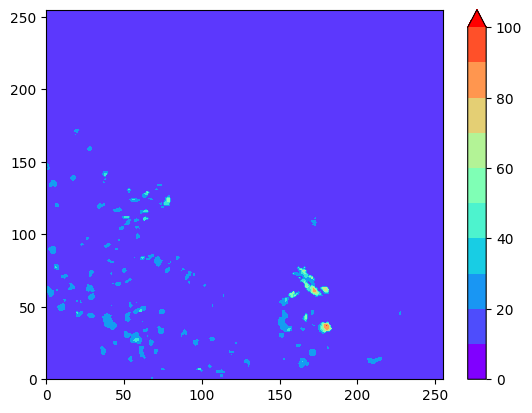

In [5]:
fig = plt.figure()
# ax3 = plt.axes(projection='3d')
xx = np.arange(256)
yy = np.arange(256)
X, Y = np.meshgrid(xx, yy)
data = np.load("NJU_CPOL_kdpRain/data_dir_000/frame_007.npy")
# data = median_filter("NJU_CPOL_kdpRain\data_dir_000\frame_007.npy", "dBZ")
# ax3.plot_surface(X, Y, data, cstride=1, cmap='rainbow')
plt.contourf(X,Y,data, zdim='z',offset=0, cmap='rainbow')   #等高线图，要设置offset，为Z的最小值

cmap = mpl.cm.rainbow
norm = mpl.colors.BoundaryNorm([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], cmap.N, extend="max")
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.show()

In [ ]:
df_radar = pd.read_csv("/home/zhouquan/MyDoc/Math_Model/Dataset/radar_path.csv")
df_radar_32 = df_radar[df_radar["rain_id"] == "data_dir_032"]

df_rainfall = pd.read_csv("/home/zhouquan/MyDoc/Math_Model/Dataset/rainfall_path.csv")
df_rainfall_32 = df_rainfall[df_rainfall["rain_id"] == "data_dir_032"]

fig = plt.figure()
ax3 = plt.axes(projection='3d')
xx = np.arange(256)
yy = np.arange(256)
X, Y = np.meshgrid(xx, yy)
data = median_filter("/home/zhouquan/MyDoc/Math_Model/Dataset/NJU_CPOL_update2308/dBZ/7.0km/data_dir_032/frame_029.npy", "dBZ")
ax3.plot_surface(X, Y, data, cstride=1, cmap='rainbow')
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow)   #等高线图，要设置offset，为Z的最小值
plt.show()

# plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# plt.colorbar()